## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [5]:
my_data = np.genfromtxt('student_scores.csv', delimiter=',',skip_header=1)

#### Explore your data

In [6]:
print(my_data)

[[ 2.5 21. ]
 [ 5.1 47. ]
 [ 3.2 27. ]
 [ 8.5 75. ]
 [ 3.5 30. ]
 [ 1.5 20. ]
 [ 9.2 88. ]
 [ 5.5 60. ]
 [ 8.3 81. ]
 [ 2.7 25. ]
 [ 7.7 85. ]
 [ 5.9 62. ]
 [ 4.5 41. ]
 [ 3.3 42. ]
 [ 1.1 17. ]
 [ 8.9 95. ]
 [ 2.5 30. ]
 [ 1.9 24. ]
 [ 6.1 67. ]
 [ 7.4 69. ]
 [ 2.7 30. ]
 [ 4.8 54. ]
 [ 3.8 35. ]
 [ 6.9 76. ]
 [ 7.8 86. ]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [7]:
x = my_data[:,0]
y= my_data[:,1]

#### Explore your data

In [8]:
print(x)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]


In [9]:
print(y)

[21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86.]


#### Plot the original data (scatter plot of X,y)

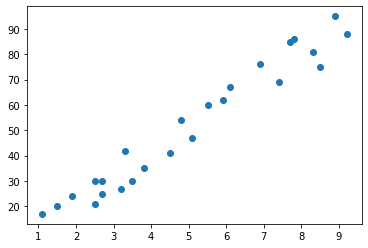

In [7]:
plt.scatter(x,y)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 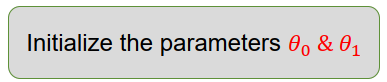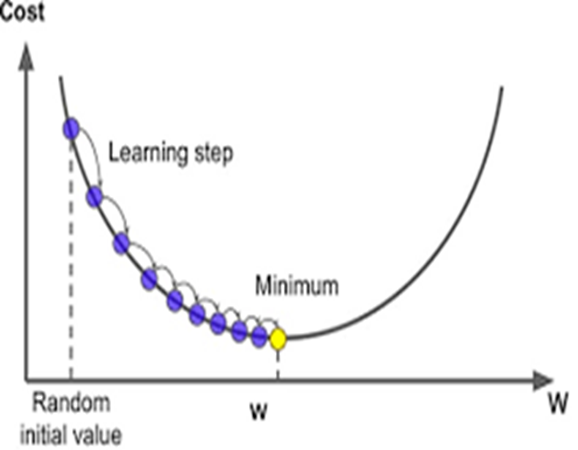

In [8]:
theta_0 = 0
theta_1 = 1

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
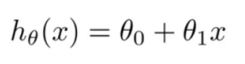
#### Note: you will need to iterate through all data points

In [9]:
hx = theta_0 + theta_1 *x
print(hx)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 )
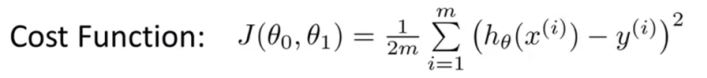

In [10]:
cost_f = (sum((hx-y)**2)/(2*len(x)))
cost_f

1329.7846

### Step4: Calculate the gradient.


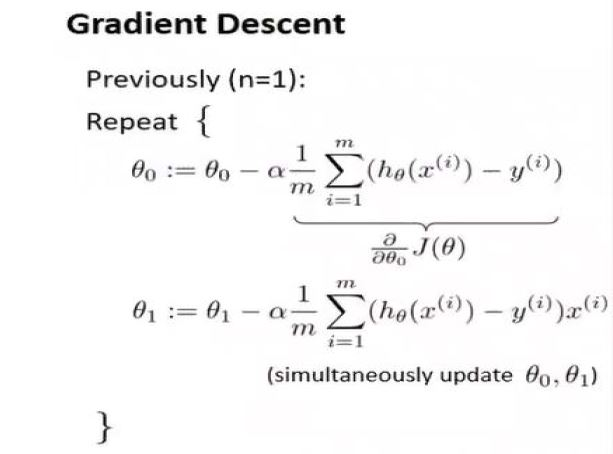

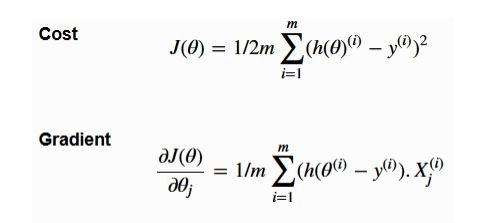





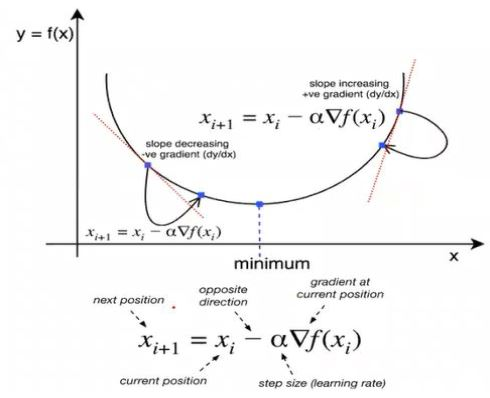

In [11]:
alpha = 0.01

G0 = 1/len(x) * sum((hx-y))
G1 = sum((hx-y)*x)/len(x)
print(G0)
print(G1)

-46.468
-286.6148


### Step5: Update the parameters (simultaneously)
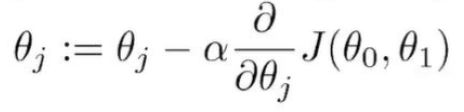

In [12]:
theta0 = theta_0 -alpha*G0
theta1 = theta_1 -alpha*G1
print(theta0)
print(theta1)

0.46468000000000004
3.866148


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.


8.JPG
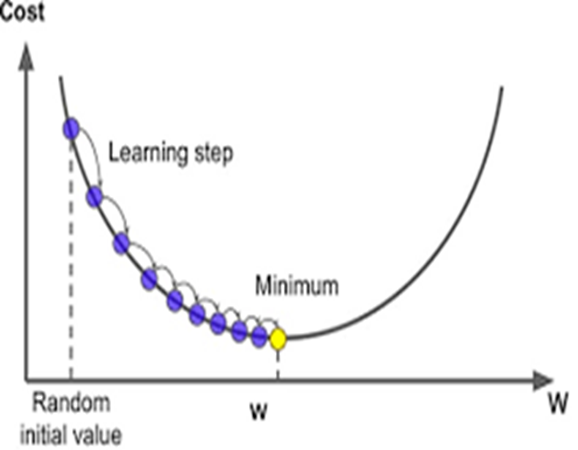

In [13]:
for i in range(1000):
    hx = theta_0 + theta_1 *x
    cost_f = (sum((hx-y)**2)/(2*len(x)))
    G0 = 1/len(x) * sum((hx-y))
    G1 = sum((hx-y)*x)/len(x)
    theta_0 = theta_0 -alpha*G0
    theta_1 = theta_1 -alpha*G1
    


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
h = theta_0 + theta_1 *x
h

array([26.83147529, 52.31309072, 33.69191021, 85.63520322, 36.63209661,
       17.03085397, 92.49563814, 56.23333925, 83.67507895, 28.79159955,
       77.79470616, 60.15358778, 46.43271793, 34.67197234, 13.11060544,
       89.55545174, 26.83147529, 20.9511025 , 62.11371204, 74.85451976,
       28.79159955, 49.37290433, 39.57228301, 69.9542091 , 78.77476829])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

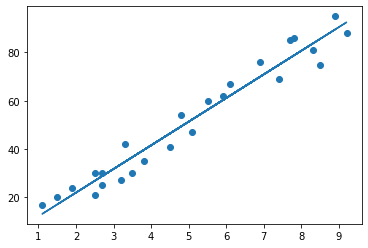

In [15]:
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [16]:
ymean = np.mean(y)
ssres = sum((y-h)**2)
sstot = sum((y-ymean)**2)
r2 = 1-(ssres/sstot)
r2

0.9529406504606069

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [17]:
theta_0 = 0
theta_1 = 1
h = theta_0 + theta_1 *x 
loss_f = np.zeros(1000)
for i in range(1000):
    hx = theta_0 + theta_1 *x
    cost_f = (sum((hx-y)**2)/(2*len(x)))
    loss_f[i] = cost_f
    G0 = 1/len(x) * sum((hx-y))
    G1 = sum((hx-y)*x)/len(x)
    theta_0 = theta_0 -alpha*G0
    theta_1 = theta_1 -alpha*G1
h = theta_0 + theta_1 *x    

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

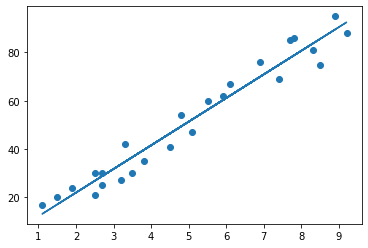

In [18]:
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [19]:
theta_0 = 0
theta_1 = 1
h = theta_0 + theta_1 *x 
loss_f = np.zeros(1000)
for i in range(1000):
    hx = theta_0 + theta_1 *x
    cost_f = (sum((hx-y)**2)/(2*len(x)))
    loss_f[i] = cost_f
    G0 = 1/len(x) * sum((hx-y))
    G1 = sum((hx-y)*x)/len(x)
    theta_0 = theta_0 -alpha*G0
    theta_1 = theta_1 -alpha*G1
h = theta_0 + theta_1 *x    

iteration = np.array(range(1000))

### Plot loss vs. iterations

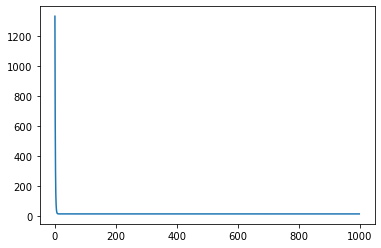

In [20]:
plt.plot(iteration,loss_f)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
path = 'california_housing_train.csv'
df=pd.read_csv(path,header=1,names=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])


#rescaling data to make all data in range -1 ,1
df= (df-df.mean()) / df.std()
df.insert(0,'Ones',1)


print(df.head(10))

   Ones  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     1   2.540086 -0.573278           -0.761917     2.296678        3.230651   
1     1   2.495194 -0.905461           -0.920812    -0.882378       -0.866881   
2     1   2.490206 -0.928854           -1.159156    -0.524104       -0.480142   
3     1   2.490206 -0.961605           -0.682469    -0.545664       -0.506241   
4     1   2.485218 -0.933533            0.032562    -0.576400       -0.719778   
5     1   2.485218 -0.942890           -0.285230     0.120882        0.333670   
6     1   2.480230 -0.372096            0.985936    -0.840174       -0.881117   
7     1   2.480230 -0.942890            0.429801     0.984228        1.508122   
8     1   2.475242 -0.372096            1.383175    -0.525939       -0.546576   
9     1   2.475242 -0.938211           -1.000260     0.503470        0.620758   

   population  households  median_income  median_house_value  
0   -0.261872   -0.099403      -1.081543     

In [24]:
x0 = df.iloc[:,0]
x0=np.array(x0.values)
x1 = df.iloc[:,1]
x1=np.array(x1.values)
x2 = df.iloc[:,2]
x2=np.array(x2.values)
x3 = df.iloc[:,3]
x3=np.array(x3.values)
x4 = df.iloc[:,4]
x4=np.array(x4.values)
x5 = df.iloc[:,5]
x5=np.array(x5.values)
x6 = df.iloc[:,6]
x6=np.array(x6.values)
x7 = df.iloc[:,7]
x7=np.array(x7.values)
x8 = df.iloc[:,8]
x8=np.array(x8.values)

y = df.iloc[:,9]
y=np.array(y.values)
x1

array([ 2.54008613,  2.49519434,  2.49020636, ..., -2.36309554,
       -2.36309554, -2.38803542])

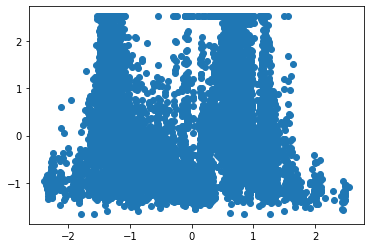

In [25]:
plt.scatter(x1,y)
plt.show()

### Repeat your implementation but for more than one variable

In [26]:
def GD(x,h,y):
    g = sum((h-y)*x)/len(x)
    return g

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [28]:
t0,t1,t2,t3,t4,t5,t6,t7,t8 = 0,0,0,0,0,0,0,0,0
h = t0*x0 + t1 *x1 + t2*x2 + t3*x3 + t4*x4 + t5*x5 + t6*x6 + t7*x7 + t8*x8
h


array([0., 0., 0., ..., 0., 0., 0.])

### Plot loss vs. iterations

In [29]:
t0,t1,t2,t3,t4,t5,t6,t7,t8 = 0,0,0,0,0,0,0,0,0
alpha = 0.1
cost_f = (sum((h-y)**2)/(2*len(x1)))
print('Cost Before iteration: ',cost_f)
loss_f = np.zeros(1000)
for i in range(1000):
    cost_f = (sum((h-y)**2)/(2*len(x1)))
    loss_f[i] = cost_f
    h = t0*x0 + t1 *x1 + t2*x2 + t3*x3 + t4*x4 + t5*x5 + t6*x6 + t7*x7 + t8*x8   
    
    
    G0 = 1/len(x1) * sum((h-y))
    G1 = GD(x1,h,y)
    G2 = GD(x2,h,y)
    G3 = GD(x3,h,y)
    G4 = GD(x4,h,y)
    G5 = GD(x5,h,y)
    G6 = GD(x6,h,y)
    G7 = GD(x7,h,y)
    G8 = GD(x8,h,y)
    
    t0 = t0 -alpha*G0
    t1 = t1 -alpha*G1
    t2 = t2 -alpha*G2
    t3 = t3 -alpha*G3
    t4 = t4 -alpha*G4
    t5 = t5 -alpha*G5
    t6 = t6 -alpha*G6
    t7 = t7 -alpha*G7
    t8 = t8 -alpha*G8


print('Cost After iteration: ',cost_f) 

Cost Before iteration:  0.49997058650507986
Cost After iteration:  0.17935705598934906


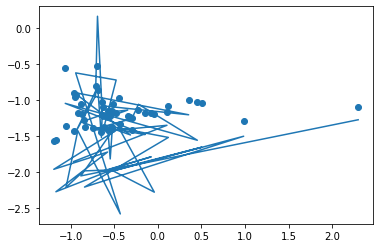

In [30]:
plt.scatter(x4[:50],y[:50])
plt.plot(x4[:50],h[:50])
plt.show()

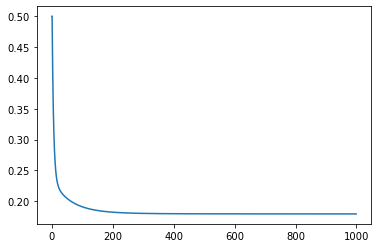

In [31]:
iteration = np.array(range(1000))
plt.plot(iteration,loss_f)
plt.show()

#### Use R2 score to evaluate LR equation output

In [32]:
ymean = np.mean(y)
ssres = sum((y-h)**2)
sstot = sum((y-ymean)**2)
r2 = 1-(ssres/sstot)
r2

0.6412649548316314

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [1]:
from sklearn.linear_model import LinearRegression

In [14]:
my_data = np.genfromtxt('student_scores.csv', delimiter=',',skip_header=1)
x = my_data[:,:-1]
y= my_data[:,1]

In [15]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86.]


#### Train the model (fit the model to the training data)

In [16]:
regressor = LinearRegression()
regressor.fit(x, y)
print('Intercept = ', regressor.intercept_)
print('Coeficient = ', regressor.coef_)

Intercept =  2.48367340537321
Coeficient =  [9.77580339]


#### Predict y values using the trained model

In [18]:
h = regressor.predict(x)
h

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

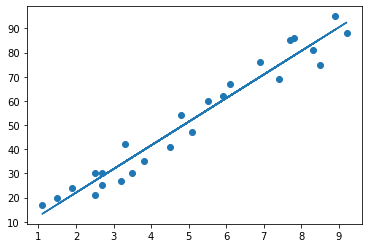

In [19]:
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

#### Use R2 score to evaluate model output

In [20]:
ymean = np.mean(y)
ssres = sum((y-h)**2)
sstot = sum((y-ymean)**2)
r2 = 1-(ssres/sstot)
r2

0.9529481969048356

### Repeat for Mulivariate

In [24]:
my_data = np.genfromtxt('california_housing_train.csv', delimiter=',',skip_header=1)

In [25]:
x = np.array(my_data[:, :-1])
y=  np.array(my_data[:, -1])

In [26]:
print(x)
print(y)

[[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]
[ 66900.  80100.  85700. ... 103600.  85800.  94600.]


In [28]:
regressor = LinearRegression()
regressor.fit(x, y)
print('Intercept = ', regressor.intercept_)
print('Coeficient = ', regressor.coef_)

Intercept =  -3620600.8929740265
Coeficient =  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]


In [30]:
h = regressor.predict(x)
h

array([  7128.08452523,  73675.60144236, -31317.28531194, ...,
       100878.32872673,  63733.22144719, 186850.92450277])

In [31]:
ymean = np.mean(y)
ssres = sum((y-h)**2)
sstot = sum((y-ymean)**2)
r2 = 1-(ssres/sstot)
r2

0.6413378529502715